In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
listings_2020 = pd.read_csv('../../../../1. Inputs/Listings Data/2020/Listings_price_from_2020/listings.csv')

C:\Users\ggeor\AppData\Local\Temp\ipykernel_29868\3370590613.py:1: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_2020 = pd.read_csv('../../../../1. Inputs/Listings Data/2020/Listings_price_from_2020/listings.csv')


In [63]:
# subset to include only rows with room_type = Entire home/apt
entire_home = listings_2020[listings_2020['room_type'] == 'Entire home/apt']

In [64]:
print(entire_home.shape)

(47445, 106)


In [7]:
# the unique dtypes of the columns in dataset_1
print(entire_home.dtypes.unique())

# print the columns for each dtype
for dtype in entire_home.dtypes.unique():
    print(entire_home.select_dtypes(include=[dtype]).columns)

[dtype('int64') dtype('O') dtype('float64')]
Index(['id', 'accommodates', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm'],
      dtype='object')
Index(['name', 'description', 'neighborhood_overview', 'host_response_time',
       'host_response_rate', 'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'amenities', 'price', 'instant_bookable'],
      dtype='object')
Index(['host_listings_count', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'beds', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


In [65]:
# keep only the columns from entire_home (id, name, description, neighbourhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_identity_verified,calculated_host_listings_count_entire_homes,neighbourhood_cleansed,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm, review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month)
columns_to_keep = ['id', 'name', 'description', 'neighborhood_overview', 'host_response_time', 'host_response_rate', 'host_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']

entire_home = entire_home[columns_to_keep]

In [66]:
# load average_price_by_listing_id_price_range_df.csv
average_price_by_listing_id_price_range_df = pd.read_csv('../../../../2. Analysis/Calendars Analysis/2020/Output Average Price CSV/average_price_by_listing_id_price_range_df.csv')

In [67]:
# dropneighbourhood from average_price_by_listing_id_price_range_df
average_price_by_listing_id_price_range_df = average_price_by_listing_id_price_range_df.drop(columns=['neighbourhood'])

In [68]:
# merge average_price_by_listing_id_price_range_df with entire_home on listing_id and id columns
entire_home = average_price_by_listing_id_price_range_df.merge(entire_home, left_on='listing_id', right_on='id')

In [69]:
# drop id column
entire_home = entire_home.drop(columns=['id'])

In [70]:
# the unique dtypes of the columns in dataset_1
print(entire_home.dtypes.unique())

# print the columns for each dtype
for dtype in entire_home.dtypes.unique():
    print(entire_home.select_dtypes(include=[dtype]).columns)

[dtype('int64') dtype('O') dtype('float64')]
Index(['listing_id', 'accommodates', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm'],
      dtype='object')
Index(['price_segment', 'most_frequent_segment', 'name', 'description',
       'neighborhood_overview', 'host_response_time', 'host_response_rate',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'amenities', 'price', 'instant_bookable'],
      dtype='object')
Index(['mean_price', 'host_listings_count', 'latitude', 'longitude',
       'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')


In [71]:
# value counts of host_response_time, neighbourhood_cleansed, host_identity_verified, instant_bookable
print(entire_home['host_response_time'].value_counts())
print(entire_home['neighbourhood_cleansed'].value_counts())
print(entire_home['host_identity_verified'].value_counts())
print(entire_home['instant_bookable'].value_counts())


host_response_time
within an hour        22392
within a few hours     7563
within a day           4833
a few days or more      838
Name: count, dtype: int64
neighbourhood_cleansed
Westminster               7554
Kensington and Chelsea    4913
Tower Hamlets             4012
Camden                    3960
Hackney                   3461
Islington                 3199
Hammersmith and Fulham    2787
Southwark                 2674
Wandsworth                2452
Lambeth                   2451
Brent                     1184
Haringey                   992
Lewisham                   973
Greenwich                  781
Newham                     767
Ealing                     736
Barnet                     709
Richmond upon Thames       669
Waltham Forest             657
Merton                     616
Hounslow                   468
Croydon                    411
City of London             404
Bromley                    243
Kingston upon Thames       231
Enfield                    228
Hillingdon    

Clean the features from redunant puncuations

In [72]:
# convert host_response_rate to string
entire_home['host_response_rate'] = entire_home['host_response_rate'].astype(str)
# host_response_rate column has % sign, remove it
entire_home['host_response_rate'] = entire_home['host_response_rate'].str.replace('%', '')


In [14]:
# print the value counts of host_response_rate
print(entire_home['host_response_rate'].value_counts())

host_response_rate
100    23158
nan    12893
98      2208
99      1250
90      1187
       ...  
21         1
36         1
59         1
48         1
18         1
Name: count, Length: 71, dtype: int64


In [73]:
# convert host_response_rate to float
entire_home['host_response_rate'] = entire_home['host_response_rate'].astype(float)

In [375]:
print(entire_home.isnull().sum())

listing_id                         0
price_segment                      0
mean_price                         0
most_frequent_segment          37225
name                               4
description                      996
neighborhood_overview          15251
host_response_time             12893
host_response_rate             12893
host_listings_count                3
host_verifications                 3
host_identity_verified             3
neighbourhood_cleansed             0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                         18
bedrooms                          61
beds                              38
amenities                          0
price                              0
minimum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
n

Imputation in the missing values of Numerical, Categorical and Text Features 

Numerical Features (bathrooms, bedrooms,beds,host_listings_count)

In [74]:
# impute bathrooms, bedrooms, beds with the median value by price segment and neighbourhood_cleansed
entire_home['bathrooms'] = entire_home['bathrooms'].fillna(entire_home.groupby(['price_segment', 'neighbourhood_cleansed'])['bathrooms'].transform('median'))
entire_home['bedrooms'] = entire_home['bedrooms'].fillna(entire_home.groupby(['price_segment', 'neighbourhood_cleansed'])['bedrooms'].transform('median'))
entire_home['beds'] = entire_home['beds'].fillna(entire_home.groupby(['price_segment', 'neighbourhood_cleansed'])['beds'].transform('median'))
entire_home['host_listings_count'] = entire_home['host_listings_count'].fillna(entire_home.groupby(['price_segment', 'neighbourhood_cleansed'])['host_listings_count'].transform('median'))

In [88]:
print(entire_home.isnull().sum())   

listing_id                         0
price_segment                      0
mean_price                         0
most_frequent_segment          37225
name                               4
description                      996
neighborhood_overview          15251
host_response_time             12893
host_response_rate             12893
host_listings_count                0
host_verifications                 3
host_identity_verified             3
neighbourhood_cleansed             0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
amenities                          0
price                              0
minimum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
n

One listing had been in two price segment and had a missing value in bed and it will dropped.

In [75]:
# drop row with misssing value in beds
entire_home = entire_home.dropna(subset=['beds'])

Text Features (name, description, neighbourhood_overview, host_verifications)

In [76]:
# assign an empty string in the null values of name
entire_home['name'] = entire_home['name'].fillna('')
entire_home['description'] = entire_home['description'].fillna('')
entire_home['neighborhood_overview'] = entire_home['neighborhood_overview'].fillna('')
entire_home['host_verifications'] = entire_home['host_verifications'].fillna('')

Categorical Feature (host_identity_verified)

In [77]:
# assign the mode value in the null values of host_identity_verified
entire_home['host_identity_verified'] = entire_home['host_identity_verified'].fillna(entire_home['host_identity_verified'].mode()[0])

In [983]:
# number of columns with a least one missing value
print(entire_home.isnull().sum())

listing_id                         0
price_segment                      0
mean_price                         0
most_frequent_segment          37225
name                               0
description                        0
neighborhood_overview              0
host_response_time             12893
host_response_rate             12893
host_listings_count                0
host_verifications                 0
host_identity_verified             0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
amenities                          0
price                              0
minimum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
n

In [405]:
print(entire_home.columns)

Index(['listing_id', 'price_segment', 'mean_price', 'most_frequent_segment',
       'name', 'description', 'neighborhood_overview', 'host_response_time',
       'host_response_rate', 'host_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')


Feature Creation from Calendars' Insights

1. Calculation the distance from the London centre using Haversine Formula

In [78]:
# London's central point latitude and longitude according to latlong.net
london_lat = 51.509865
london_lon = -0.118092

# calculate the distance from the central point of London using harvesine formula library
from haversine import haversine

entire_home['distance_from_centre_in_km'] = entire_home.apply(lambda x: haversine((london_lat, london_lon), (x['latitude'], x['longitude'])), axis=1)

2. Calculate the number of listings in a neighbourhood

In [79]:
# calculate the number of listings in of price segment within a neighbourhood and assign the number to a new column for each listing
entire_home['#_listings_in_neighbourhood'] = entire_home.groupby(['neighbourhood_cleansed'])['listing_id'].transform('count')

In [80]:
print(entire_home.shape)

(48519, 39)


Text Data Cleaning

In [20]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

Amenities

In [16]:
def clean_text(text):
    return re.sub('\W+|\d+', ' ', text).lower().strip()

def parse_amenities(amenities):
    # split only by commas that are not inside quotes
    pattern = re.compile(r',\s*(?![^"]*"(?:(?:[^"]*"){2})*[^"]*$)')
    # split the string, remove quotes, and apply clean_text to each item
    return [clean_text(item.strip(' "\'')) for item in pattern.split(amenities)]

def custom_tokenizer(text):
    return parse_amenities(text)

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ggeor\AppData\Local\Temp\ipykernel_29868\3896021812.py:2: SyntaxWarning: invalid escape sequence '\W'
  return re.sub('\W+|\d+', ' ', text).lower().strip()


In [25]:
vectorizer = CountVectorizer(binary=True, tokenizer=custom_tokenizer, preprocessor=None, stop_words='english')

amenities_matrix = vectorizer.fit_transform(entire_home['amenities'])

amenities_df = pd.DataFrame(amenities_matrix.toarray(), columns=vectorizer.get_feature_names_out())

C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
# print the columns of the amenities_df with 1 values
print(amenities_df.columns[amenities_df.sum() ==1])

Index(['ceiling fans', 'ceiling hoist', 'dual vanity', 'gas fireplace',
       'lounge area', 'natural gas barbeque', 'propane barbeque', 'rooftop',
       'shared hot tub', 'shower bathtub combo', 'ski in ski out',
       'stand alone bathtub', 'stand alone rain shower',
       'surround sound system', 'touchless faucets', 'video games',
       'wine cellar', 'wood burning fireplace', 'yoga studio'],
      dtype='object')


In [27]:
# remove the column with name ''
amenities_df = amenities_df.drop(columns=[''])

In [81]:
# merge the amenities_df with entire_home
entire_home = pd.concat([entire_home, amenities_df], axis=1)

Host Verifications

In [52]:
host_verifications_matrix = vectorizer.fit_transform(entire_home['host_verifications'])

host_verifications_df = pd.DataFrame(host_verifications_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(host_verifications_df)

          email  facebook  google  government_id  identity_manual  jumio  kba  \
0      0      1         0       0              1                0      1    0   
1      0      1         1       0              0                0      0    0   
2      0      1         0       0              1                1      0    0   
3      0      1         0       0              1                0      1    0   
4      0      1         0       0              1                1      1    0   
...   ..    ...       ...     ...            ...              ...    ...  ...   
47440  0      1         0       0              1                1      0    0   
47441  0      1         0       1              1                0      1    0   
47442  0      1         0       1              1                1      1    0   
47443  0      1         0       0              1                1      0    0   
47444  0      1         0       0              1                1      0    0   

       manual_offline  manu

In [53]:
# remove the column with name ''
host_verifications_df = host_verifications_df.drop(columns=[''])

In [82]:
# merge the host_verifications_df with entire_home
entire_home = pd.concat([entire_home, host_verifications_df], axis=1)

In [28]:
print(amenities_df)

       accessible height bed  accessible height toilet  air conditioning  \
0                          0                         0                 0   
1                          0                         0                 1   
2                          0                         0                 0   
3                          0                         0                 1   
4                          0                         0                 0   
...                      ...                       ...               ...   
47440                      0                         0                 1   
47441                      0                         0                 0   
47442                      0                         0                 0   
47443                      0                         0                 1   
47444                      0                         0                 0   

       air purifier  alfresco bathtub  amazon echo  apple tv  baby bath  \
0           

In [1039]:
# store amenities_df in a csv file
amenities_df.to_csv('../../amentities_df.csv', index=False)

In [ ]:
# store verifications_df in a csv file
host_verifications_df.to_csv('../../host_verifications_df.csv', index=False)

Save all the different price segments in different dataframes (only text columns need to be handled)

In [118]:
# create a subset of rows with price_Segment = 'Budget'
budget_2020 = entire_home[entire_home['price_segment'] == 'Budget']
# create a subset of rows with price_Segment = 'Mid-Range'
mid_range_2020 = entire_home[entire_home['price_segment'] == 'Mid-Range']
# create a subset of rows with price_Segment = 'High-End'
high_end_2020 = entire_home[entire_home['price_segment'] == 'High-End']
# create a subset of rows with price_Segment = 'Luxury'
luxury_2020 = entire_home[entire_home['price_segment'] == 'Luxury']
# one for superior
superior_2020 = entire_home[entire_home['price_segment'] == 'Superior']

# save the subsets to csv files to entire_homes_segments_2020 folder in Listings Analysis
budget_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/budget_2020.csv', index=False)
mid_range_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/mid_range_2020.csv', index=False)
high_end_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/high_end_2020.csv', index=False)
luxury_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/luxury_2020.csv', index=False)
superior_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/superior_2020.csv', index=False)

Retain only the most frequent segment of listings for the analysis of the entire dataset

In [994]:
# retain the rows that match the price segment and most frequent segment (ignore the NaN values)
# keep rows that belond to this range of mean_price if the mean price is between 8-90 keep , if the price is between 91-125 keep if the price is between 126-196 keep, if the price is between 197-365 keep and if price is betewen 356-8000 keep in entire_home_copy_cleaned
# add a condition to so that is applied the below code chunk only to columns with a value in most_frequent_segment but also include in the final df those with NaN values in most_frequent_segment
conditions = (
    ((entire_home['most_frequent_segment'] == 'Budget') & (entire_home['mean_price'] >= 8) & (entire_home['mean_price'] <= 90)) |
    ((entire_home['most_frequent_segment'] == 'Mid-Range') & (entire_home['mean_price'] >= 91) & (entire_home['mean_price'] <= 125)) |
    ((entire_home['most_frequent_segment'] == 'High-End') & (entire_home['mean_price'] >= 126) & (entire_home['mean_price'] <= 196)) |
    ((entire_home['most_frequent_segment'] == 'Luxury') & (entire_home['mean_price'] >= 197) & (entire_home['mean_price'] <= 355)) |
    ((entire_home['most_frequent_segment'] == 'Superior') & (entire_home['mean_price'] >= 356) & (entire_home['mean_price'] <= 8000)) |
    pd.isna(entire_home['most_frequent_segment'])  
)

entire_home = entire_home[conditions]

In [995]:
# reset the index
entire_home = entire_home.reset_index(drop=True)

print(entire_home)

       listing_id price_segment  mean_price most_frequent_segment  \
0           11551        Budget   90.000000                   NaN   
1           15400        Budget   75.000000                   NaN   
2           17402        Luxury  312.966418                   NaN   
3           25023        Budget   66.417910                   NaN   
4           36299      High-End  195.000000                   NaN   
...           ...           ...         ...                   ...   
47412    39870723      High-End  150.000000              High-End   
47413    39870925     Mid-Range   99.000000             Mid-Range   
47414    39877525        Luxury  205.000000                   NaN   
47415    39878402     Mid-Range  100.000000                   NaN   
47416    39880297     Mid-Range  110.000000                   NaN   

                                                   name  \
0            Arty and Bright London Apartment in Zone 2   
1                   Bright Chelsea  Apartment. Chelse

In [83]:
# drop name and description and neighbourhood_overview columns
entire_home = entire_home.drop(columns=['neighborhood_overview', 'amenities', 'host_verifications','most_frequent_segment', 'price_segment'])

In [997]:
# store a dataframe excluding the mean_price columns and name it entire_home_original_price
entire_home_original_price = entire_home.drop(columns=['mean_price'])

In [84]:
# store a dataframe excluing the price columns and name it entire_home_mean_price
entire_home_mean_price = entire_home.drop(columns=['price'])

In [1001]:
# save the dataframes to csv files
entire_home_original_price.to_csv('../../2. Analysis/Listings Analysis/entire_home_original_price_2020.csv', index=False)
entire_home_mean_price.to_csv('../../2. Analysis/Listings Analysis/entire_home_mean_price_2020.csv', index=False)

In [209]:
# print the percentage of listings with over 500 in mean_price
print(entire_home[entire_home['mean_price'] > 950].shape[0] / entire_home.shape[0])

0.010470125105628723


Create a copy of the entire home and drop all the na values

In [85]:
# 1. entire home copy
entire_home_copy = entire_home.copy()

In [86]:
# drop price column from entire_home_copy
entire_home_copy = entire_home_copy.drop(columns=['price'])

In [816]:
# drop na values frmo entire_home_copy
entire_home_copy = entire_home_copy.dropna()

print(entire_home_copy.shape)

(27344, 272)


In [817]:
print(entire_home_copy)

       listing_id  mean_price  \
0           11551   90.000000   
2           17402  312.966418   
3           25023   66.417910   
4           36299  195.000000   
5           36986   80.000000   
...           ...         ...   
47011    39744950   99.000000   
47016    39745370   80.000000   
47098    39778814  113.891566   
47124    39789577  120.000000   
47270    39836317  100.000000   

                                                    name  \
0             Arty and Bright London Apartment in Zone 2   
2                  Superb 3-Bed/2 Bath & Wifi: Trendy W1   
3          All-comforts 2-bed flat near Wimbledon tennis   
4                    Kew Gardens 3BR house in cul-de-sac   
5      Gorgeous Victorian Flat Overlooking London Fields   
...                                                  ...   
47011  ★ Beautiful 1Bed East London Flat - well conne...   
47016                      Private nice clean appartment   
47098                                   Camden Penthouse   
471

In [87]:
# drop the price, price segment, listing id from entire_home_copy
entire_home_copy = entire_home_copy.drop(columns=['listing_id'])

In [88]:
# apply one hot encoding to neighbourhood_cleansed, instant_bookable, host_identity_verified, host_response_time
entire_home_copy = pd.get_dummies(entire_home_copy, columns=['neighbourhood_cleansed', 'instant_bookable', 'host_identity_verified', 'host_response_time'])

In [90]:
# drop name and description and neighbourhood_overview columns from entire_home_copy
entire_home_copy = entire_home_copy.drop(columns=['name', 'description'])


In [100]:
# drop rows with na values in entire_home_copy
entire_home_copy = entire_home_copy.dropna()

In [101]:
print(entire_home_copy.isnull().sum().head(20))

mean_price                     0
host_listings_count            0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
reviews_per_month              0
distance_from_centre_in_km     0
#_listings_in_neighbourhood    0
accessible height bed          0
accessible height toilet       0
dtype: int64


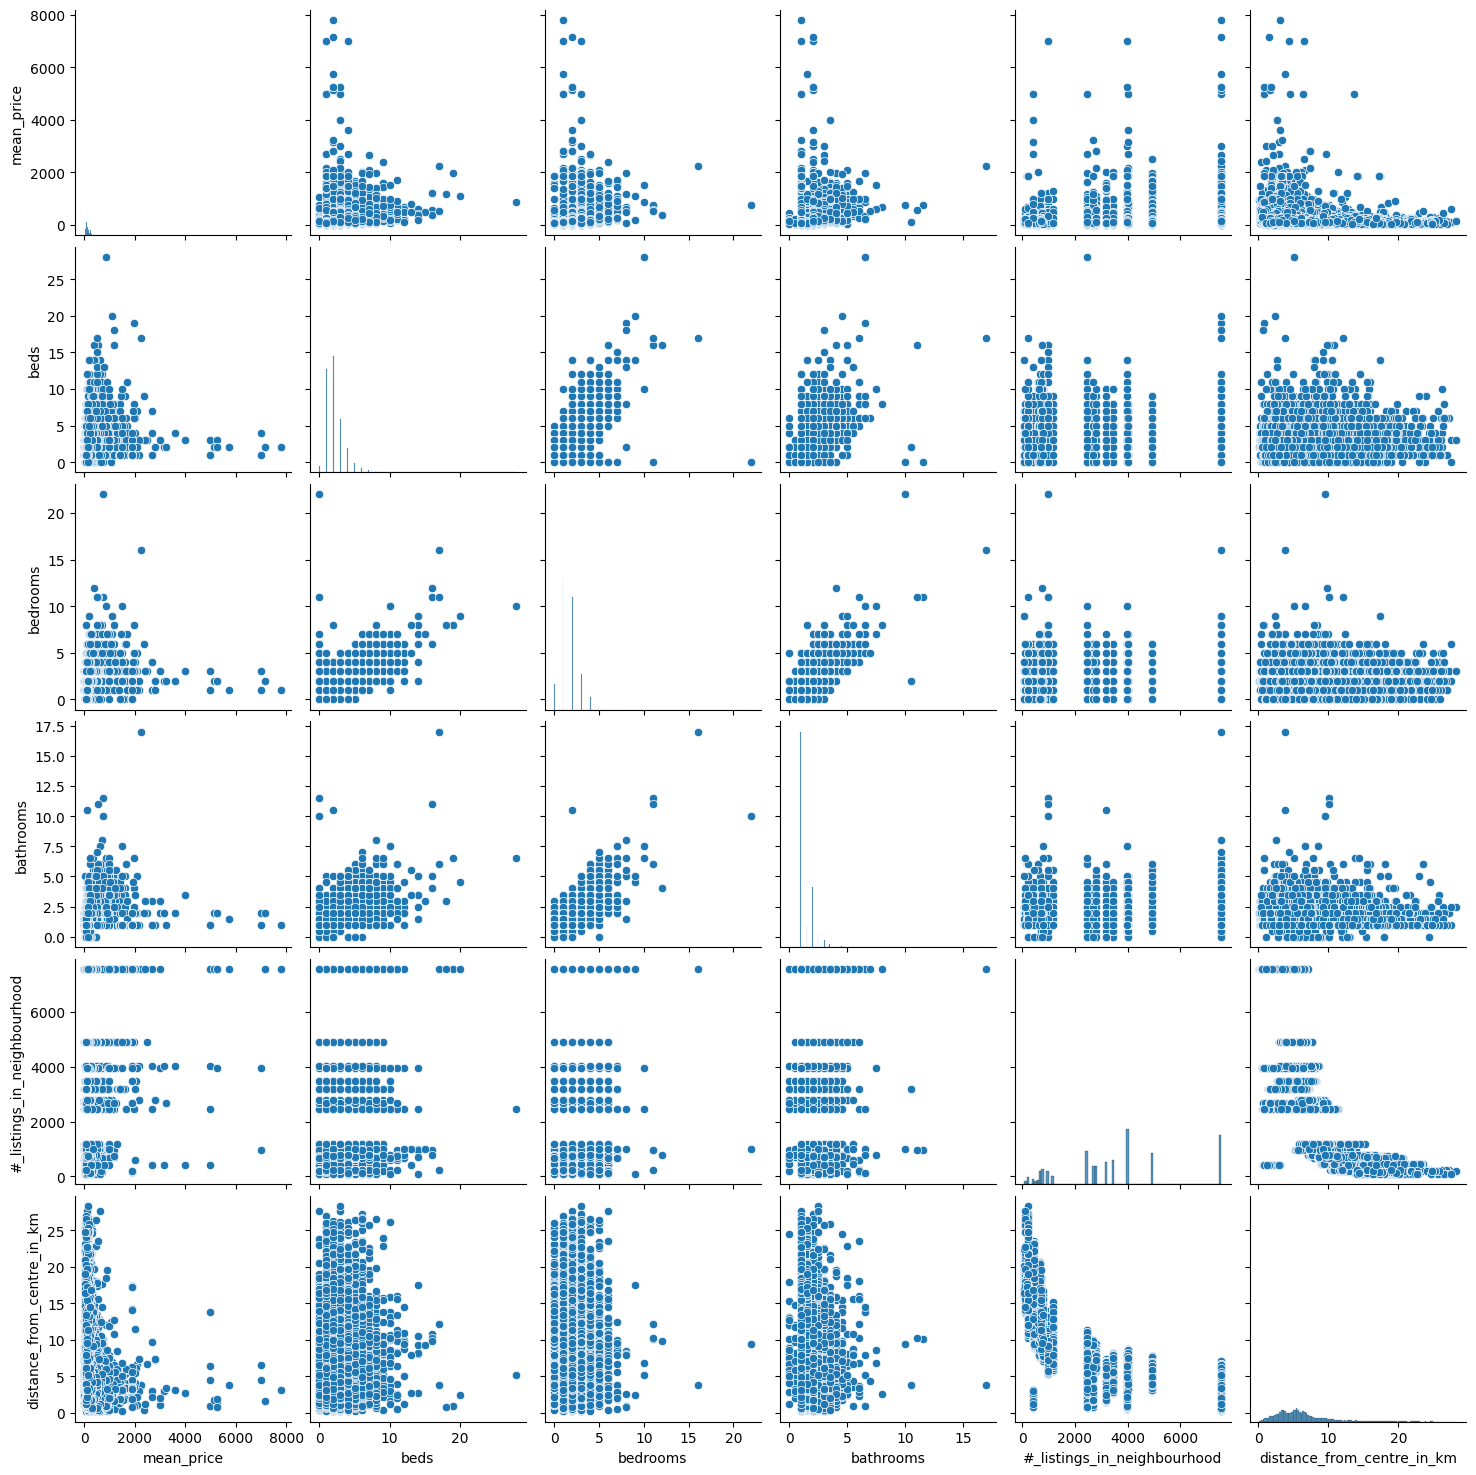

In [108]:
# columns price , beds, bedrooms, bathrooms, #_listings_in_neighbourhood, distance_from_centre_in_km in a list
columns_for_pairplot = ['mean_price', 'beds', 'bedrooms', 'bathrooms', '#_listings_in_neighbourhood', 'distance_from_centre_in_km']

# pairplot of the columns in columns_for_pairplot
sns.pairplot(entire_home_copy[columns_for_pairplot])
plt.show()


In [ ]:
# tranform mean_price to log
entire_home_copy['mean_price'] = np.log(entire_home_copy['mean_price'])

In [109]:
# copy entire_home_copy
entire_home_copy2 = entire_home.copy()

In [112]:
# keep 'id', 'name', 'description', 'neighborhood_overview', 'host_response_time','host_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates','bathrooms', 'bedrooms''beds', 'amenities', 'price', 'minimum_nights','instant_bookable', 'cancellation_policy', 'distance_from_centre_in_km', '#_listings_in_neighbourhood', 'mean_price' in entire_home_copy2
columns_to_keep = ['name', 'description', 'host_response_time','host_listings_count', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates','bathrooms', 'bedrooms','beds', 'minimum_nights','instant_bookable', 'distance_from_centre_in_km', '#_listings_in_neighbourhood', 'mean_price']

entire_home_copy2 = entire_home_copy2[columns_to_keep]

In [114]:
# drop na values from entire_home_copy2
entire_home_copy2 = entire_home_copy2.dropna()

In [113]:
print(entire_home_copy2)

                                                   name  \
0            Arty and Bright London Apartment in Zone 2   
1                   Bright Chelsea  Apartment. Chelsea!   
2                 Superb 3-Bed/2 Bath & Wifi: Trendy W1   
3         All-comforts 2-bed flat near Wimbledon tennis   
4                   Kew Gardens 3BR house in cul-de-sac   
...                                                 ...   
48514        Stylish 1 bed flat in Seven Sisters London   
48515  3 Bedroom 3 Floor Apartment 5 min to Kings Cross   
48516        Maida Vale lovely 3BR apartment w/ terrace   
48517  ★ Charming 1Bed Apt  - 5mins from Burgess Park ★   
48518                                     Fabulous flat   

                                             description host_response_time  \
0      Unlike most rental apartments out there my fla...     within an hour   
1      Lots of windows and light.  St Luke's Gardens ...                NaN   
2      You'll have a wonderful stay in this superb mo.

In [115]:
# transform mean price to original from log
import numpy as np
entire_home_copy2['mean_price'] = np.exp(entire_home_copy2['mean_price'])

C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [116]:
# percentage of presence of amenities in the listings in amazing_df_no_na
percentage_presence = amenities_df.sum() / amenities_df.shape[0]

# sort the percentage_presence in descending order
percentage_presence = percentage_presence.sort_values(ascending=False)

In [117]:
print(len(percentage_presence[percentage_presence > 0.1]))

45


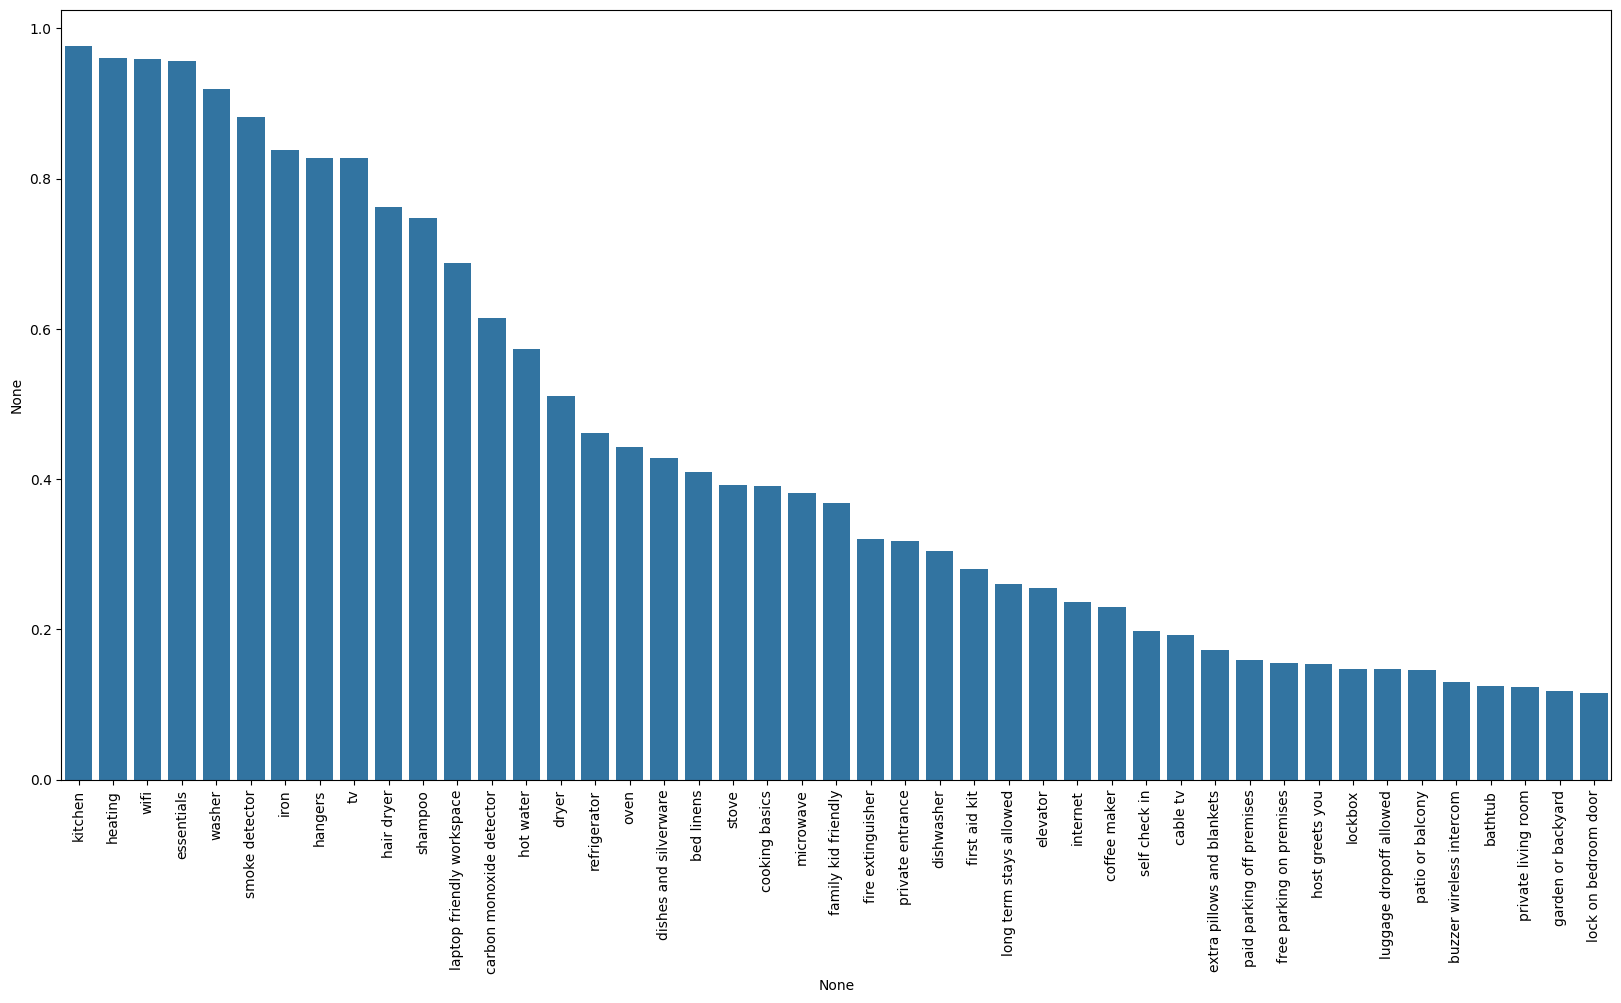

In [118]:
# plot the percentage_presence of listings with over 10% presence of amenities in the listings in ammenities_df_no_na and plot the price in a binary plot with the mean_price
plt.figure(figsize=(20,10))
sns.barplot(x=percentage_presence[percentage_presence > 0.1].index, y=percentage_presence[percentage_presence > 0.1])
plt.xticks(rotation=90)
plt.show()


In [120]:
# print the colums in amenities_df_no_na with 1 value
print(amenities_df.columns[amenities_df.sum() == 1])

Index(['ceiling fans', 'ceiling hoist', 'dual vanity', 'gas fireplace',
       'lounge area', 'natural gas barbeque', 'propane barbeque', 'rooftop',
       'shared hot tub', 'shower bathtub combo', 'ski in ski out',
       'stand alone bathtub', 'stand alone rain shower',
       'surround sound system', 'touchless faucets', 'video games',
       'wine cellar', 'wood burning fireplace', 'yoga studio'],
      dtype='object')


In [119]:
print(amenities_df.columns[amenities_df.sum() < 10])

Index(['air purifier', 'alfresco bathtub', 'apple tv', 'beach view',
       'breakfast bar', 'ceiling fans', 'ceiling hoist', 'charcoal barbeque',
       'dining table', 'dual vanity', 'fax machine', 'fire pit', 'garden',
       'gas fireplace', 'ground floor access', 'hammock', 'hbo go',
       'heat lamps', 'ice machine', 'jetted tub', 'lounge area', 'media room',
       'mobile hoist', 'mountain view', 'mudroom', 'natural gas barbeque',
       'nespresso machine', 'office', 'outdoor kitchen', 'parking', 'piano',
       'private bathroom', 'private hot tub', 'projector and screen',
       'propane barbeque', 'rooftop', 'satellite tv', 'sauna',
       'security system', 'shared gym', 'shared hot tub', 'shared pool',
       'shower bathtub combo', 'ski in ski out', 'sonos sound system',
       'stand alone bathtub', 'stand alone rain shower',
       'stand alone steam shower', 'standing valet', 'surround sound system',
       'tennis court', 'touchless faucets', 'video games', 'wet bar